<a href="https://colab.research.google.com/github/kprakz/titanicPassengerSurvival/blob/Streamlit_App/modelTrainingNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic Classification Model

In [66]:
# prompt: upload a csv file from local machine if the file is not present in "/content/"

import os

# Check if the file exists
if not os.path.exists("/content/processed_train_v2.csv"):
  from google.colab import files
  uploaded = files.upload()
  # Assuming the file is named 'titanic.csv'
  if 'processed_train_v2.csv' in uploaded:
      print("File 'processed_train_v2.csv' uploaded successfully.")
  else:
      print("Error: 'processed_train_v2.csv' not found in the uploaded files.")
else:
  print("File 'processed_train_v2.csv' already exists in /content/.")


File 'processed_train_v2.csv' already exists in /content/.


In [60]:
# prompt: upload a csv file from local machine if the file is not present in "/content/"

import os

# Check if the file exists
if not os.path.exists("/content/processed_train.csv"):
  from google.colab import files
  uploaded = files.upload()
  # Assuming the file is named 'titanic.csv'
  if 'processed_train.csv' in uploaded:
      print("File 'processed_train.csv' uploaded successfully.")
  else:
      print("Error: 'processed_train.csv' not found in the uploaded files.")
else:
  print("File 'processed_train.csv' already exists in /content/.")


Saving processed_train.csv to processed_train.csv
File 'processed_train.csv' uploaded successfully.


In [68]:
# prompt: read a csv file

import pandas as pd
df = pd.read_csv('/content/processed_train_v2.csv')
df.head()

,Unnamed: 0,Title_Don,Title_Jonkheer,Title_Officer,Title_Master,Title_Sir,Title_Mr,Title_Miss,Title_Mrs,Age,Sex,Fare,Pclass_2,Pclass_3,Deck,FamilySize,IsAlone,Embarked_Q,Embarked_S,Survived
0,0,0,0,0,0,0,1,0,0,-0.534591,0,2.110213,0,1,0,1,0,0,1,0
1,1,0,0,0,0,0,0,0,1,0.668017,1,4.280593,0,0,3,1,0,0,0,1
2,2,0,0,0,0,0,0,1,0,-0.233939,1,2.188856,0,1,0,0,1,0,1,1
3,3,0,0,0,0,0,0,0,1,0.442528,1,3.990834,0,0,3,1,0,0,1,1
4,4,0,0,0,0,0,1,0,0,0.442528,0,2.202765,0,1,0,0,1,0,1,0


In [69]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [70]:
df.head()

,Title_Don,Title_Jonkheer,Title_Officer,Title_Master,Title_Sir,Title_Mr,Title_Miss,Title_Mrs,Age,Sex,Fare,Pclass_2,Pclass_3,Deck,FamilySize,IsAlone,Embarked_Q,Embarked_S,Survived
0,0,0,0,0,0,1,0,0,-0.534591,0,2.110213,0,1,0,1,0,0,1,0
1,0,0,0,0,0,0,0,1,0.668017,1,4.280593,0,0,3,1,0,0,0,1
2,0,0,0,0,0,0,1,0,-0.233939,1,2.188856,0,1,0,0,1,0,1,1
3,0,0,0,0,0,0,0,1,0.442528,1,3.990834,0,0,3,1,0,0,1,1
4,0,0,0,0,0,1,0,0,0.442528,0,2.202765,0,1,0,0,1,0,1,0


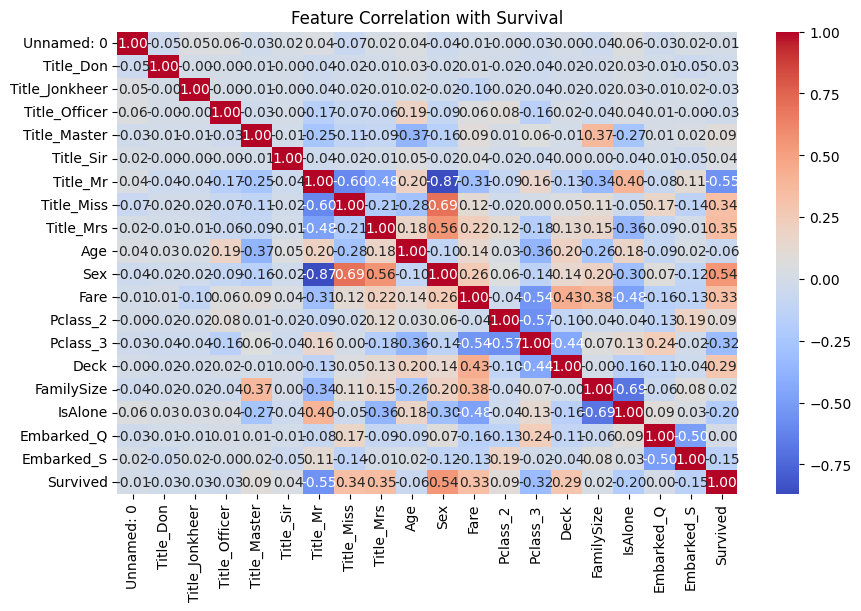

In [3]:
#Correlation check
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with Survival")
plt.show()

Lets extract the columns which highly correlate with survival rate

In [4]:
filtered_df = df[['Title_Don', 'Title_Jonkheer','Title_Officer' ,'Title_Master','Title_Sir', 'Title_Mr',
                        'Title_Miss', 'Title_Mrs', 'Sex', 'Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Deck', 'IsAlone', 'Survived']].copy()

In [5]:
filtered_df.head()

,Title_Don,Title_Jonkheer,Title_Officer,Title_Master,Title_Sir,Title_Mr,Title_Miss,Title_Mrs,Sex,Age,Fare,Pclass_2,Pclass_3,Deck,IsAlone,Survived
0,0,0,0,0,0,1,0,0,0,-0.534591,2.110213,0,1,0,0,0
1,0,0,0,0,0,0,0,1,1,0.668017,4.280593,0,0,3,0,1
2,0,0,0,0,0,0,1,0,1,-0.233939,2.188856,0,1,0,1,1
3,0,0,0,0,0,0,0,1,1,0.442528,3.990834,0,0,3,0,1
4,0,0,0,0,0,1,0,0,0,0.442528,2.202765,0,1,0,1,0


Base Line Model : Logistic regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
X = df.drop(columns= ['Survived']) # Features
Y = df['Survived'] # Target

Train Test split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = scaler.transform(X_test[['Age', 'Fare']])

In [10]:
X_train, X_test = X_train.to_numpy(), X_test.to_numpy()
Y_train, Y_test = Y_train.to_numpy(), Y_test.to_numpy()

Model Training

In [11]:
log_reg = LogisticRegression(max_iter= 1000)
log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [12]:
log_reg.coef_

array([[ 3.14024563e-04, -4.50061047e-01, -1.53586958e-01,
        -4.32482119e-01,  1.10558263e+00,  3.44020101e-01,
        -1.35876829e+00,  1.26654112e-01,  8.67935295e-01,
        -4.39531164e-01,  1.16889232e+00,  5.04187613e-01,
        -2.19386804e-01, -9.71128454e-01,  2.37714918e-01,
        -4.75197978e-01, -4.90302345e-02,  2.16353920e-01,
        -3.52167111e-01]])

In [13]:
log_reg.score(X_train, Y_train)

0.8314606741573034

In [14]:
log_reg.score(X_test, Y_test)

0.8435754189944135

In [15]:
y_pred = log_reg.predict(X_test)

In [16]:
accuracy_score(Y_test, y_pred)

0.8435754189944135

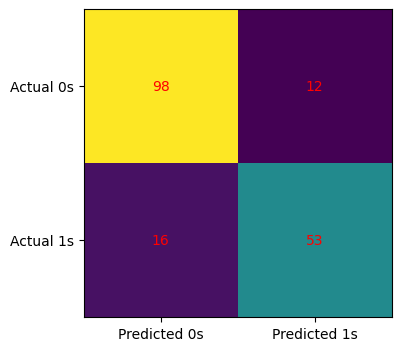

In [17]:
cm = confusion_matrix(Y_test, y_pred)

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [18]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       110
           1       0.82      0.77      0.79        69

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



Decision Tree model

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
tree_model = DecisionTreeClassifier(max_depth= 3, min_samples_split=100, random_state=42)
tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=100, random_state=42)

In [50]:
tree_model.score(X_train, Y_train)

0.8314606741573034

In [51]:
tree_model.score(X_test, Y_test)

0.8379888268156425

In [52]:
y_pred_dt = tree_model.predict(X_test)

In [53]:
accuracy_score(Y_test, y_pred_dt)

0.8379888268156425

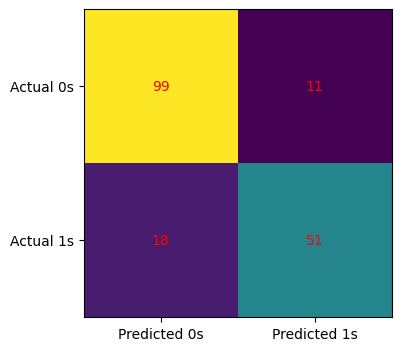

In [54]:
cm = confusion_matrix(Y_test, y_pred_dt)
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [55]:
print(classification_report(Y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       110
           1       0.82      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



[Text(0.5769230769230769, 0.875, 'x[6] <= 0.5\ngini = 0.473\nsamples = 712\nvalue = [439, 273]'),
 Text(0.3076923076923077, 0.625, 'x[13] <= 0.5\ngini = 0.42\nsamples = 300\nvalue = [90, 210]'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'x[3] <= 0.5\ngini = 0.196\nsamples = 163\nvalue = [18, 145]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.114\nsamples = 149\nvalue = [9, 140]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.459\nsamples = 14\nvalue = [9, 5]'),
 Text(0.46153846153846156, 0.375, 'x[15] <= 3.5\ngini = 0.499\nsamples = 137\nvalue = [72, 65]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.476\nsamples = 100\nvalue = [39, 61]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.193\nsamples = 37\nvalue = [33, 4]'),
 Text(0.8461538461538461, 0.625, 'x[14] <= 2.5\ngini = 0.259\nsamples = 412\nvalue = [349.0, 63.0]'),
 Text(0.7115384615384615, 0.75, '  False'),
 Text(0.7692307692307693, 0.375, 'x[11] <= 1.083\ngini = 0.2\nsamples = 364\nvalue = [323,

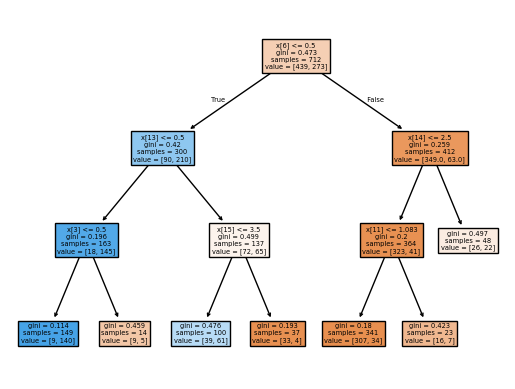

In [56]:
from sklearn.tree import plot_tree
plot_tree(tree_model, filled=True)

In [57]:
tree_model.feature_importances_

array([0.        , 0.        , 0.        , 0.05301109, 0.        ,
       0.        , 0.63440695, 0.        , 0.        , 0.        ,
       0.        , 0.01101749, 0.        , 0.1566196 , 0.06187997,
       0.08306491, 0.        , 0.        , 0.        ])

Let's compare key metrics:

Model	Train Accuracy	Test Accuracy	Overfitting?	Precision (Survived)	Recall (Survived)	F1-score (Survived)
Logistic Regression	83.1%	84.3%	No	0.82	0.77	0.79
Decision Tree (max_depth=3, min_samples_split=3)	83.3%	79.3%	Slight	0.71	0.78	0.74
Decision Tree (max_depth=5, min_samples_split=3)	87.3%	80.4%	Overfitting	0.71	0.78	0.74
Decision Tree (max_depth=3, min_samples_split=100)	83.1%	83.7%	No	0.82	0.74	0.78
🔍 What Insights Should You Get?
1️⃣ Did your model overfit?

Depth = 5 decision tree is overfitting. Training accuracy is very high (87.3%), but test accuracy is only 80.4% → This means the model is memorizing training data rather than generalizing well.

A good model should have similar train & test accuracy!

2️⃣ Which model generalizes better?

Logistic Regression (84.3%) and Decision Tree (depth=3, min_samples_split=100) (83.7%) generalize best (they have similar train-test accuracy).

Deep trees tend to overfit, while simple models perform well.

3️⃣ What do Precision & Recall tell you?

Precision (Survived = 1): Of those predicted as survivors, how many actually survived?

Logistic Regression: 0.82 (82%) → A good score, meaning false positives are controlled.

Decision Tree (depth=3, min_samples_split=100): 0.82 (82%) → Also strong.

A deep tree (depth=5) performs worse (0.71), meaning it misclassifies more non-survivors as survivors.

Recall (Survived = 1): Of actual survivors, how many did we correctly predict?

Logistic Regression: 0.77 → Good balance between missing survivors and false positives.

Decision Tree (depth=3, min_samples_split=100): 0.74 → Slightly lower, but balanced.

Deep tree (depth=5) has the same recall but lower precision, making it less reliable.

4️⃣ Is Decision Tree better than Logistic Regression?

Logistic Regression performs slightly better (84.3%), which means a linear decision boundary is capturing the pattern well.

Decision Tree (depth=3, min_samples_split=100) performs close (83.7%), showing that some non-linear relationships exist but don’t improve results significantly.

When analyzing results, you should ask these questions to improve performance:

❓ Feature Engineering:
Are there missing patterns that features could capture?
→ Could you create new features like "Survival probability by Deck"?

Did categorical encoding help?
→ Try different encoding strategies (Label Encoding, One-Hot, Target Encoding).

❓ Model Selection & Hyperparameter Tuning:
Should I try more complex models (Random Forest, Gradient Boosting)?
→ Decision Trees alone tend to overfit.

Can I tune Logistic Regression hyperparameters (regularization strength)?
→ Try changing C value (inverse of regularization).

❓ Performance Metrics:
Which metric matters most: Precision, Recall, or F1-score?
→ If prioritizing saving lives, Recall is more important (we don’t want to miss survivors!).

What’s the best trade-off between precision & recall?
→ Try adjusting the decision threshold (instead of 0.5, try 0.4 or 0.6).

.

🎯 Final Thoughts
1️⃣ Logistic Regression is the best model so far (84.3%) because it generalizes well and balances precision & recall.
2️⃣ Decision Trees show signs of overfitting (especially deeper trees).
3️⃣ To improve results, try Random Forest, XGBoost, and feature engineering.
4️⃣ Fine-tune hyperparameters and adjust decision thresholds to optimize precision vs. recall.



**Exporting the model**

In [58]:
import joblib

In [59]:
joblib.dump(log_reg, 'log_reg_model.pkl')
joblib.dump(tree_model, 'tree_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [63]:
model_test = joblib.load('tree_model.pkl')

In [64]:
y_pred = model_test.predict(X_test)

In [65]:
accuracy_score(Y_test, y_pred)

0.8379888268156425